In [3]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.signal import cwt,ricker
from scipy import stats
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.optimizers
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.models import load_model
from tensorflow.keras.layers import Flatten,concatenate,Layer,Dense,LSTM,Activation,MaxPooling2D,Dropout,Conv2D,BatchNormalization,Reshape,UpSampling2D,ZeroPadding2D

In [4]:
random.seed(1314)

def Mean(data):
    return np.mean(data,axis=1)

def Std(data):
    return np.std(data,axis=1)

def Var(data):
    return np.var(data,axis=1)


In [5]:
random_data1 = (np.random.normal(10,4,1000000)).reshape(10000,50,1)
random_data2 = (np.random.normal(50,20,1000000)).reshape(10000,50,1)
random_data3 = (np.random.normal(100,50,1000000)).reshape(10000,50,1)
random_data4 = (np.random.normal(500,200,1000000)).reshape(10000,50,1)
random_data5 = (np.random.normal(1000,200,1000000)).reshape(10000,50,1)
random_data6 = (np.random.normal(5000,1000,1000000)).reshape(10000,50,1)
random_data7 = (np.random.normal(10000,2500,1000000)).reshape(10000,50,1)
random_data8 = (np.random.normal(50000,5000,1000000)).reshape(10000,50,1)
random_data9 = (np.random.normal(100000,20000,1000000)).reshape(10000,50,1)

# random_data1 = (np.random.normal(10,5,10000)).reshape(1000,10,1)
# random_data2 = (np.random.normal(50,50,10000)).reshape(1000,10,1)
# random_data3 = (np.random.normal(100,100,10000)).reshape(1000,10,1)
# random_data4 = (np.random.normal(500,200,10000)).reshape(1000,10,1)
# random_data5 = (np.random.normal(1000,200,10000)).reshape(1000,10,1)
# random_data6 = (np.random.normal(5000,1000,10000)).reshape(1000,10,1)
# random_data7 = (np.random.normal(10000,2500,10000)).reshape(1000,10,1)
# random_data8 = (np.random.normal(50000,5000,10000)).reshape(1000,10,1)
# random_data9 = (np.random.normal(100000,20000,10000)).reshape(1000,10,1)

#data = np.concatenate((random_data1,random_data2),axis=0)

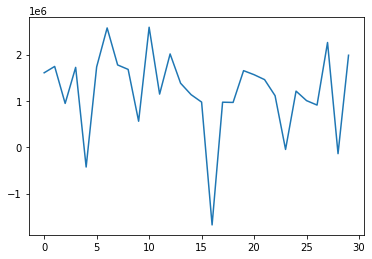

In [6]:
random_data10 = (np.random.normal(1000900,800000,100000)).reshape(1000,100,1)
feature_data10 = Mean(random_data10)
plt.plot(np.random.normal(1000900,800000,30))

In [5]:
feature_data1 = Mean(random_data1)
feature_data2 = Mean(random_data2)
feature_data3 = Mean(random_data3)
feature_data4 = Mean(random_data4)
feature_data5 = Mean(random_data5)
feature_data6 = Mean(random_data6)
feature_data7 = Mean(random_data7)
feature_data8 = Mean(random_data8)
feature_data9 = Mean(random_data9)


# Mean LSTM Model

In [108]:
mean_LSTMmodel= None
mean_LSTMmodel = Sequential()

mean_LSTMmodel.add(LSTM(32,input_shape=(10,1),activation='relu', return_sequences = False))
#mean_LSTMmodel.add(Dropout(0.2))
#mean_LSTMmodel.add(LSTM(128,activation='relu',return_sequences = True))
#mean_LSTMmodel.add(Dropout(0.5))
#mean_LSTMmodel.add(LSTM(16,activation='relu',return_sequences = False))
# mean_LSTMmodel.add(LSTM(32,activation='relu',return_sequences = True))
# mean_LSTMmodel.add(LSTM(32,activation='relu',return_sequences = True))
# mean_LSTMmodel.add(LSTM(128,activation='relu',return_sequences = True))
# mean_LSTMmodel.add(Dropout(0.2))
#mean_LSTMmodel.add(LSTM(32,activation='relu',return_sequences = False))
#mean_LSTMmodel.add(Dense(128, activation ='relu'))
#mean_LSTMmodel.add(Dense(64, activation ='relu'))

#mean_LSTMmodel.add(Dense(64, activation ='relu'))
mean_LSTMmodel.add(Dense(16, activation ='relu'))
#mean_LSTMmodel.add(Dense(32, activation ='relu'))
mean_LSTMmodel.add(Dense(1, activation ='linear'))




In [109]:
mean_LSTMmodel.compile(optimizer="adam", loss="mean_squared_error")

In [174]:
#mean_LSTMmodel.fit(random_data1, feature_data1, epochs= 1000)
#mean_LSTMmodel.fit(random_data2, feature_data2, epochs= 1000)
#mean_LSTMmodel.fit(random_data3, feature_data3, epochs= 1000)
#mean_LSTMmodel.fit(random_data4, feature_data4, epochs= 1000)
#mean_LSTMmodel.fit(random_data5, feature_data5, epochs= 1000)
#mean_LSTMmodel.fit(random_data6, feature_data6, epochs= 1000)
#mean_LSTMmodel.fit(random_data7, feature_data7, epochs= 1000)
#mean_LSTMmodel.fit(random_data8, feature_data8, epochs= 1000)
#mean_LSTMmodel.fit(random_data9, feature_data9, epochs= 1000)
#mean_LSTMmodel.fit(random_data10, feature_data10, epochs= 1000)

In [7]:
Predirect_arr1 = np.random.uniform(10, size=(30,100, 1))
Predirect_arr2 = (np.random.normal(10,5,3000)).reshape(30,100,1)
Predirect_arr3 = (np.random.normal(50,20,3000)).reshape(30,100,1)
Predirect_arr4 = (np.random.normal(100,50,3000)).reshape(30,100,1)
Predirect_arr5 = (np.random.normal(500,250,3000)).reshape(30,100,1)
Predirect_arr6 = np.random.uniform(500, size=(30,100, 1))
Predirect_arr7 = (np.random.normal(1000900,800000,3000)).reshape(30,100,1)

#print(np.mean(Predirect_arr7, axis=1))
#print(mean_LSTMmodel.predict(Predirect_arr7))
# plt.plot(range(30),np.mean(Predirect_arr1, axis=1),range(30), mean_LSTMmodel.predict(Predirect_arr1))
# plt.plot(range(30),np.mean(Predirect_arr2, axis=1),range(30), mean_LSTMmodel.predict(Predirect_arr2))
# plt.plot(range(30),np.mean(Predirect_arr3, axis=1),range(30), mean_LSTMmodel.predict(Predirect_arr3))
#plt.plot(range(30),np.mean(Predirect_arr4, axis=1),range(30), mean_LSTMmodel.predict(Predirect_arr4))
#plt.plot(range(30),np.mean(Predirect_arr5, axis=1),range(30), mean_LSTMmodel.predict(Predirect_arr5))
#plt.plot(range(30),np.mean(Predirect_arr6, axis=1),range(30), mean_LSTMmodel.predict(Predirect_arr6))
#plt.plot(range(30),np.mean(Predirect_arr7, axis=1),range(30), mean_LSTMmodel.predict(Predirect_arr7))

2/2 [==============================] - 0s 3ms/step


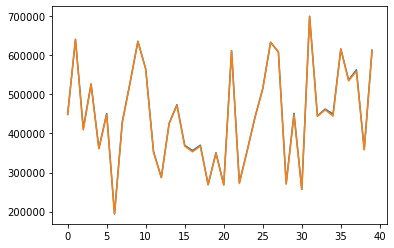

In [149]:
# data set that has large difference
random_data_rand1 = np.random.uniform(0,50, size=(200))
random_data_rand2 = np.random.uniform(800000,1000000, size=(200))

random_data_diff = np.concatenate((random_data_rand1 ,random_data_rand2))
np.random.shuffle(random_data_diff )
random_data_diff = random_data_diff.reshape(40,10,1)
plt.plot(range(40),np.mean(random_data_diff, axis=1),range(40), mean_LSTMmodel.predict(random_data_diff))

In [173]:
mean_LSTMmodel.save("./LSTMfinalMean.h5")

# STD Model

In [9]:
std_data1 = Std(random_data1)
std_data2 = Std(random_data2)
std_data3 = Std(random_data3)
std_data4 = Std(random_data4)
std_data5 = Std(random_data5)
std_data6 = Std(random_data6)
std_data7 = Std(random_data7)
std_data8 = Std(random_data8)
std_data9 = Std(random_data9)
std_data10 = Std(random_data10)

In [13]:
std_LSTMmodel= None
std_LSTMmodel = Sequential()

std_LSTMmodel.add(LSTM(25,input_shape=(100,1),activation='relu', return_sequences = False))


std_LSTMmodel.add(Dropout(0.2))


std_LSTMmodel.add(Dense(16, activation ='relu'))

# std_LSTMmodel.add(LSTM(8, activation ='relu'))
# std_LSTMmodel.add(Dropout(0.2))

std_LSTMmodel.add(Dense(1, activation ='linear'))


In [14]:
std_LSTMmodel.compile(optimizer="adam", loss="mean_squared_error")

In [10]:
std_LSTMmodel = load_model('./LSTMfinalStd1.h5')

2022-06-22 20:41:49.198471: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-22 20:41:49.198626: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (skl-024): /proc/driver/nvidia/version does not exist
2022-06-22 20:41:49.201079: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# std_LSTMmodel.fit(random_data1, std_data1, epochs= 40)
# std_LSTMmodel.fit(random_data2, std_data2, epochs= 40)
# std_LSTMmodel.fit(random_data3, std_data3, epochs= 50)
# std_LSTMmodel.fit(random_data4, std_data4, epochs= 100)
# std_LSTMmodel.fit(random_data5, std_data5, epochs= 100)
std_LSTMmodel.fit(random_data6, std_data6, epochs= 100)
std_LSTMmodel.fit(random_data7, std_data7, epochs= 100)
std_LSTMmodel.fit(random_data8, std_data8, epochs= 100)
std_LSTMmodel.fit(random_data9, std_data9, epochs= 100)
std_LSTMmodel.fit(random_data10, std_data10, epochs= 100)

Epoch 1/100
313/313 [==============================] - 7s 22ms/step - loss: 81473.9844
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 37151.3086
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 36971.0703
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 32992.9805
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 31097.6738
Epoch 6/100
313/313 [==============================] - 7s 22ms/step - loss: 29779.1113
Epoch 7/100
313/313 [==============================] - 7s 22ms/step - loss: 28615.2383
Epoch 8/100
313/313 [==============================] - 7s 23ms/step - loss: 27648.4199
Epoch 9/100
313/313 [==============================] - 7s 22ms/step - loss: 26822.5391
Epoch 10/100
313/313 [==============================] - 7s 22ms/step - loss: 26008.5723
Epoch 11/100
313/313 [==============================] - 7s 23ms/step - loss: 25383.7324
Epoch 12/100
313/313 [===================

313/313 [==============================] - 7s 22ms/step - loss: 4645.1816
Epoch 95/100
313/313 [==============================] - 7s 22ms/step - loss: 4650.6802
Epoch 96/100
313/313 [==============================] - 7s 22ms/step - loss: 11570.4736
Epoch 97/100
313/313 [==============================] - 7s 23ms/step - loss: 6159.7339
Epoch 98/100
313/313 [==============================] - 7s 22ms/step - loss: 5945.3770
Epoch 99/100
313/313 [==============================] - 7s 22ms/step - loss: 5792.6714
Epoch 100/100
313/313 [==============================] - 7s 22ms/step - loss: 5661.9443
Epoch 1/100
313/313 [==============================] - 7s 22ms/step - loss: 334924.1250
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 85566.4688
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 67653.4453
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 56532.2188
Epoch 5/100
313/313 [==============================] 

313/313 [==============================] - 7s 22ms/step - loss: 41716.9844
Epoch 88/100
313/313 [==============================] - 7s 22ms/step - loss: 40633.7656
Epoch 89/100
313/313 [==============================] - 7s 22ms/step - loss: 39371.1523
Epoch 90/100
313/313 [==============================] - 7s 22ms/step - loss: 38665.7656
Epoch 91/100
313/313 [==============================] - 7s 22ms/step - loss: 37699.5625
Epoch 92/100
313/313 [==============================] - 7s 22ms/step - loss: 36756.6836
Epoch 93/100
313/313 [==============================] - 7s 22ms/step - loss: 36094.8750
Epoch 94/100
313/313 [==============================] - 7s 22ms/step - loss: 35152.3906
Epoch 95/100
313/313 [==============================] - 7s 22ms/step - loss: 34387.9570
Epoch 96/100
313/313 [==============================] - 7s 22ms/step - loss: 33888.7852
Epoch 97/100
313/313 [==============================] - 7s 22ms/step - loss: 33468.9375
Epoch 98/100
313/313 [=======================

313/313 [==============================] - 7s 22ms/step - loss: 128533.4141
Epoch 80/100
313/313 [==============================] - 7s 22ms/step - loss: 128724.9766
Epoch 81/100
313/313 [==============================] - 7s 22ms/step - loss: 129309.9297
Epoch 82/100
313/313 [==============================] - 7s 22ms/step - loss: 131006.6719
Epoch 83/100
313/313 [==============================] - 7s 22ms/step - loss: 129689.2656
Epoch 84/100
313/313 [==============================] - 7s 21ms/step - loss: 129647.8047
Epoch 85/100
313/313 [==============================] - 7s 21ms/step - loss: 128316.9375
Epoch 86/100
313/313 [==============================] - 7s 21ms/step - loss: 129298.9062
Epoch 87/100
313/313 [==============================] - 7s 23ms/step - loss: 129270.6016
Epoch 88/100
313/313 [==============================] - 7s 23ms/step - loss: 129964.3047
Epoch 89/100
313/313 [==============================] - 7s 23ms/step - loss: 130470.3203
Epoch 90/100
313/313 [============

KeyboardInterrupt: 

1/1 [==============================] - 0s 205ms/step


ValueError: x and y can be no greater than 2D, but have shapes (30,) and (30, 100, 1)

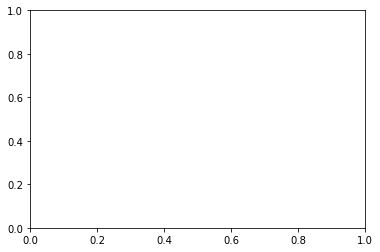

In [13]:
plt.plot(range(30),np.std(Predirect_arr1, axis=1),range(30), std_LSTMmodel.predict(Predirect_arr1))
plt.plot(range(30),np.std(Predirect_arr2, axis=1),range(30), std_LSTMmodel.predict(Predirect_arr2))
#plt.plot(range(30),np.std(Predirect_arr3, axis=1),range(30), std_LSTMmodel.predict(Predirect_arr3))
#plt.plot(range(30),np.std(Predirect_arr4, axis=1),range(30), std_LSTMmodel.predict(Predirect_arr4))
#plt.plot(range(30),np.std(Predirect_arr5, axis=1),range(30), std_LSTMmodel.predict(Predirect_arr5))

In [22]:
std_LSTMmodel.save("./LSTMfinalStd1.h5")